In [38]:
# cnn_basic
# conv2d layer
# max pooling layer
# toy image 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


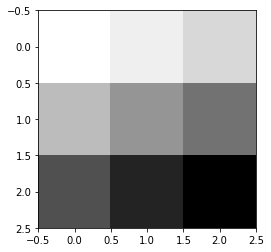

In [39]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]] , dtype=np.float32)
print(image)
print(image.shape)  # (1, 3, 3, 1),Rank=4,(4차원)
plt.imshow(image.reshape(3,3),cmap='Greys')
print(image.reshape(3,3))
plt.show()

[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


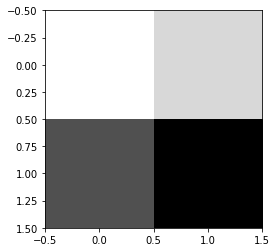

In [40]:
# CNN(Convolutional Neural Network)
# conv2d layer,filter : (2,2,1,1), stride : 1

# 입력 이미지 : (1,3,3,1)
# 1 : 이미지 갯수
# 3 : 가로 크기
# 3 : 세로 크기
# 1 : color,Grey scale ==> 1, RGB ==> 3

# filter : (2,2,1,1)
# 2 : 가로 크기
# 2 : 세로 크기
# 1 : color, Grey scale ==> 1, RGB ==>3
# 1 : filter의 갯수

# (N-F)/strides +1
# 출력 이미지 : (3-2)/1 + 1 =2, zero padding을 안 했을 때 (padding='VALID')

# filter : (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')
conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)  # (1, 2, 2, 1)
plt.imshow(conv2d_image.reshape(2,2),cmap='Greys')
plt.show()

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
(1, 3, 3, 1)


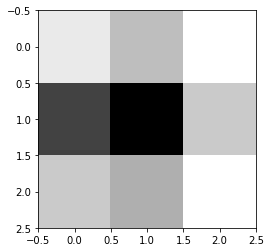

In [41]:
# 출력 이미지 : (3 +1 -2)/1 + 1 =3 ,zero padding을 했을 때 (padding='SAME')
# filter : (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')
conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)  # (1, 3, 3, 1)
plt.imshow(conv2d_image.reshape(3,3),cmap='Greys')
plt.show()

In [42]:
# mnist의 경우
# 첫번째 conv2d layer
# 원본 이미지 (None,28,28,1)
# filter (3,3,1,32) , strides (1,1,1,1)
# (28+2 - 3)/1 + 1 = 28
# 출력 : (None,28,28,32)

# 첫번째 max_pool layer
# kernel_size (1,3,3,1) , strides (1,2,2,1)
# (28+1 - 3)/2 + 1 = 14
# 출력 이미지 : (None,14,14,32)

[[[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]


 [[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]]
(2, 2, 1, 3)
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
(1, 3, 3, 3)
[[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
(3, 3, 3, 1)
(3, 3, 1)
(3, 3, 1)
(3, 3, 1)


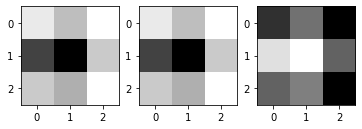

In [43]:
# conv2d layer, 3 filters, zero padding(padding='SAME')
# image : (1, 3, 3, 1) , filters (2,2,1,3), stride: (1,1)
# filters 갯수가 3개라서 한 이미지당 3개의 결과가 나옴
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],      # filters
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
# (1,1,1,1),(10,10,10,10),(-1,-1,-1,-1) filter 총 3개
print(weight.numpy())
print(weight.shape) # (2, 2, 1, 3)

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')
conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)  # (1, 3, 3, 3)

# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
print(conv2d_image)
print(conv2d_image.shape)  # (3, 3, 3, 1)

for i, one_image in enumerate(conv2d_image):
    print(one_image.shape)
    plt.subplot(1,3,i+1)
    plt.imshow(one_image.reshape(3,3),cmap='Greys')
plt.show()

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
(1, 2, 2, 1)


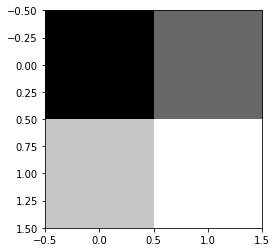

In [44]:
# max pooling : (1,2,2,1) ---> (1,2,2,1), zero padding(padding='SAME')
image  = np.array([[[[4.],[3.]],
                    [[2.],[1.]]]],dtype=np.float32)
print(image)
print(image.shape) # (1, 2, 2, 1)
plt.imshow(image.reshape(2,2),cmap='Greys')
plt.show()

In [45]:
# padding='VALID', zero padding을 하지 않음, (1,2,2,1) --> (1,1,1,1)
# (N-F)/strides + 1
# (2 - 2)/1 + 1 = 1
# ksize : 2, 원본에서 추출할 이미지의 범위
pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
print(pool.shape)  # (1, 1, 1, 1)
print(pool.numpy()) # [[[[4.]]]]

(1, 1, 1, 1)
[[[[4.]]]]


In [46]:
# padding='SAME', zero padding을 함 , (1,2,2,1) --> (1,2,2,1)
# (N-F)/strides + 1, F는 kernal size(ksize)
# (2+1 - 2)/1 + 1 = 1
# ksize : 2, 원본에서 추출할 이미지의 범위
pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],padding='SAME')
print(pool.shape)  # (1, 2, 2, 1)
print(pool.numpy()) 

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


(60000, 28, 28)
(28, 28)
2


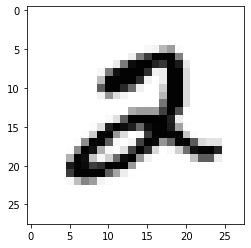

In [47]:
# mnist 데이터 가져오기
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)

image = x_train[5]
print(image.shape)
print(y_train[5])  # 숫자 2

plt.imshow(image,cmap='Greys')
plt.show()

(1, 28, 28, 1)
(1, 14, 14, 5)
(5, 14, 14, 1)


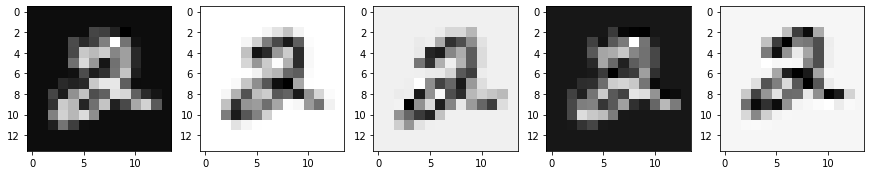

In [48]:
# MNIST conv2d layer
# image : (1,28,28,1)
# filter : (3,3,1,5), 필터 5개
# strides : (1,2,2,1),padding='SAME'
# 출력 이미지:(28+1 -3)/2 +1 = 14

img = image.reshape(-1,28,28,1)
print(img.shape)

W = tf.Variable(tf.random.normal([3,3,1,5]),name='weight') # filter
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image.shape)  # strides가 2라서 14가 됨

# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
# print(conv2d_image)
print(conv2d_image.shape)  # (5,14,14,1)

plt.figure(figsize=(15,15))
for i, one_image in enumerate(conv2d_image):
    #print(one_image.shape)
    plt.subplot(1,5,i+1)
    plt.imshow(one_image.reshape(14,14),cmap='Greys')
plt.show()


(1, 7, 7, 5)
(5, 7, 7, 1)


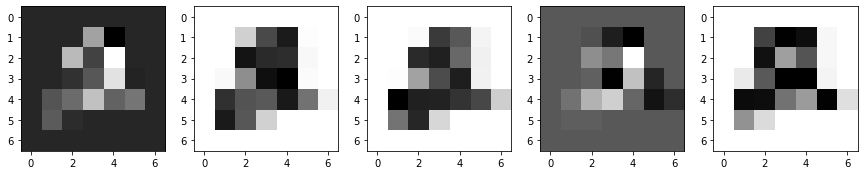

In [50]:
# MNIST max_pool layer
# conv2d image : (1,14,14,5)
# kernel size : (1,2,2,1), strides : (1,2,2,1), padding ='SAME'
# 출력 이미지 : (14+1 - 2)/2 + 1 = 7

pool = tf.nn.max_pool(conv2d,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

pool_img = pool.numpy()
print(pool_img.shape)  # (1, 7, 7, 5)

# 시각화
pool_image = np.swapaxes(pool_img,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
# print(pool_image)
print(pool_image.shape)  # (5,7,7,1)

plt.figure(figsize=(15,15))
for i, one_image in enumerate(pool_image):
    # print(one_image.shape)
    plt.subplot(1,5,i+1)
    plt.imshow(one_image.reshape(7,7),cmap='Greys')
plt.show()